In [74]:
import numpy as np
from pydmd import SpDMD, DMD
from matplotlib import pyplot as plt

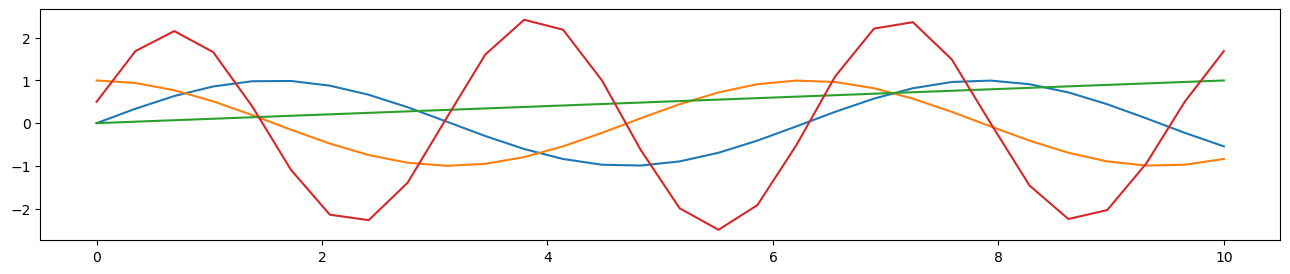

In [75]:
n = 30
start = 0
end = 10
domain = np.linspace(start,end,n)

x = np.sin(domain)
y = np.cos(domain)
z = domain/10
q = 2*np.sin(domain*2) + 0.5 * np.cos(domain*1.7)

X = np.array([x,y,z,q])
plt.figure(figsize=(16,3))
plt.plot(domain,X.T)
plt.show()

In [76]:
def time_delay_embedding(X, k):
    m, n = X.shape
    delayed_blocks = [X[:, i:n - k + i + 1] for i in range(k)]    
    X_td = np.vstack(delayed_blocks)
    return X_td

delay_embeddings = 3
X = time_delay_embedding(X, delay_embeddings)

In [77]:
sdmd = SpDMD(svd_rank=-1, gamma=0.1)
dmd = DMD(svd_rank=-1)

sdmd.fit(X)
dmd.fit(X)

sparse_modes = sdmd.modes
sparse_eigs = sdmd.eigs
sparse_amps = sdmd.amplitudes

modes = dmd.modes
eigs = dmd.eigs
amps = dmd.amplitudes

C:\Users\peterdb1\Anaconda3\envs\koopman\lib\site-packages\pydmd\snapshots.py:73: UserWarning: Input data condition number 2.4877089749531988e+16. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


ADMM: 10000 iterations


In [82]:
def reconstruct_fine(dmd, fine_time, dt=1.0):
    Phi = dmd.modes               # (n_features, n_modes)
    lam = dmd.eigs                # (n_modes,)
    b = dmd.amplitudes            # (n_modes,)

    omega = np.log(lam) / dt      # Continuous-time eigenvalues
    time_dynamics = np.array([
        b[i] * np.exp(omega[i] * fine_time)
        for i in range(len(b))
    ])                            # shape: (n_modes, len(fine_time))

    return (Phi @ time_dynamics).real

In [89]:
fine_time = np.linspace(start, end, 30)  # 300 time points
X_fine_dmd = reconstruct_fine(dmd, fine_time, dt=1.0)[:4,:].T
X_fine_spdmd = reconstruct_fine(dmd, fine_time, dt=1.0)[:4,:].T

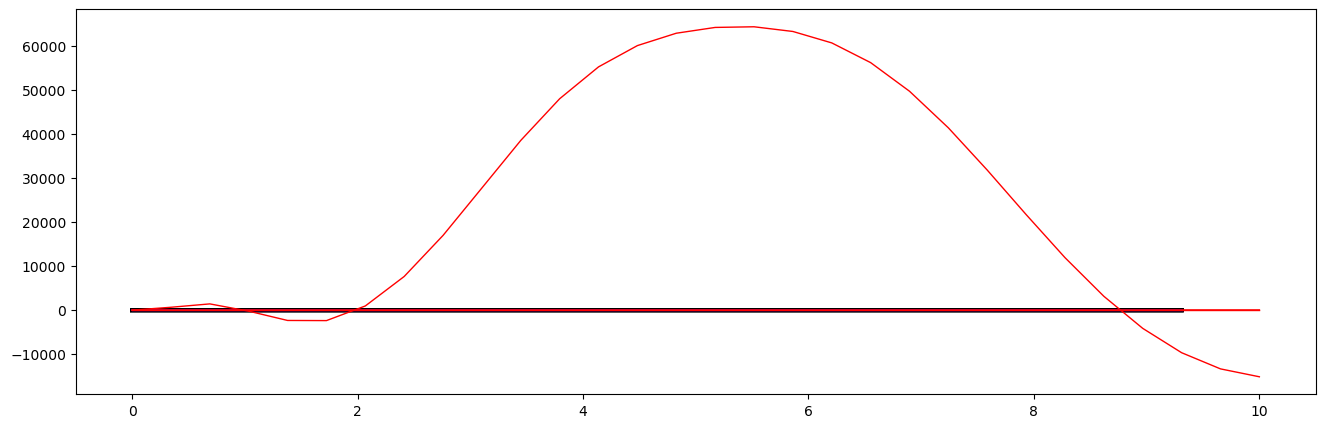

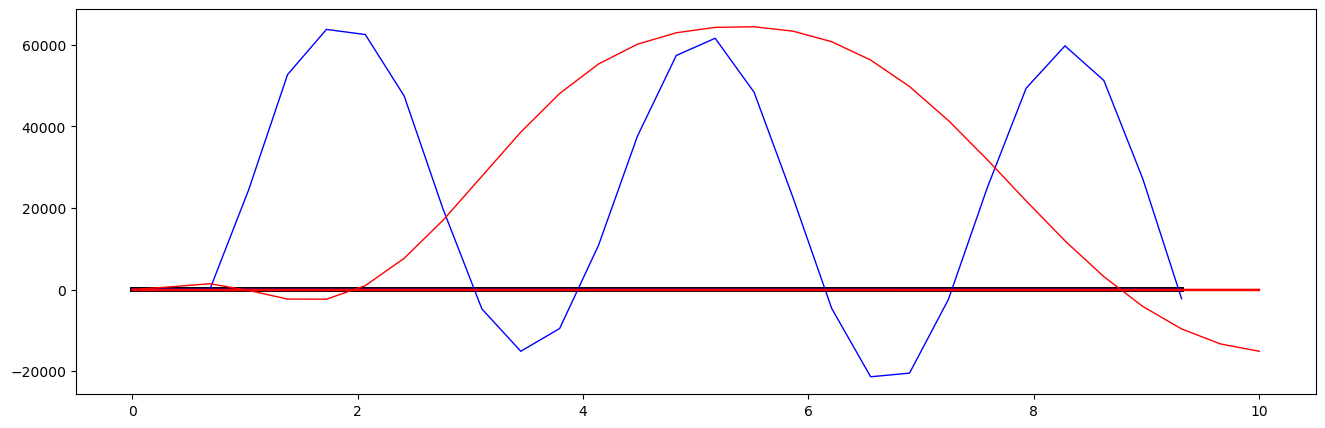

In [90]:
sparse_reconstructed_data = sdmd.reconstructed_data[:4,:].T
reconstructed_data = dmd.reconstructed_data[:4,:].T

plt.figure(figsize=(16,5))
plt.plot(domain[:n-delay_embeddings+1],X[:4,:].T,linewidth=3,color='k')
plt.plot(domain[:n-delay_embeddings+1],sparse_reconstructed_data,linewidth=1,color='b')
plt.plot(fine_time,X_fine_spdmd,linewidth=1,color='r')
plt.show()

plt.figure(figsize=(16,5))
plt.plot(domain[:n-delay_embeddings+1],X[:4,:].T,linewidth=3,color='k')
plt.plot(domain[:n-delay_embeddings+1],reconstructed_data,linewidth=1,color='b')
plt.plot(fine_time,X_fine_dmd,linewidth=1,color='r')
plt.show()

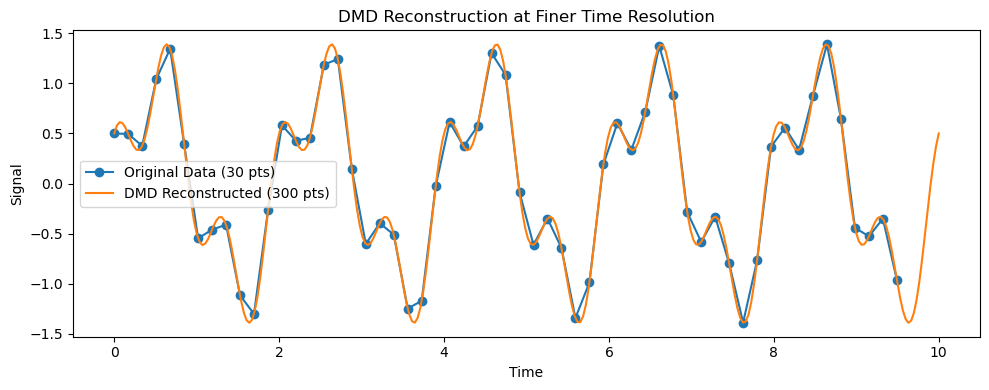

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from pydmd import DMD

# Step 1: Generate sample data
n = 60
t_original = np.linspace(start, end, n)  # 30 time points
dt = t_original[1] - t_original[0]

signal = np.sin(2 * np.pi * 0.5 * t_original) + 0.5 * np.cos(2 * np.pi * 1.5 * t_original)
X = signal[np.newaxis, :]  # Shape (1, 30) - single feature

delay_embeddings = 4
X = time_delay_embedding(X, delay_embeddings)

# Step 2: Fit standard DMD
dmd = DMD(svd_rank=-1)
dmd.fit(X)

def time_delay_embedding(X, k):
    m, n = X.shape
    delayed_blocks = [X[:, i:n - k + i + 1] for i in range(k)]    
    X_td = np.vstack(delayed_blocks)
    return X_td



# Step 3: Reconstruct at finer resolution
def dmd_reconstruct_fine(dmd, fine_time, dt=1.0):
    Phi = dmd.modes               # (n_features, n_modes)
    lam = dmd.eigs                # (n_modes,)
    b = dmd.amplitudes            # (n_modes,)

    omega = np.log(lam) / dt      # Continuous-time eigenvalues
    time_dynamics = np.array([
        b[i] * np.exp(omega[i] * fine_time)
        for i in range(len(b))
    ])                            # shape: (n_modes, len(fine_time))

    return (Phi @ time_dynamics).real

# Step 4: Define finer time grid and reconstruct
t_fine = np.linspace(t_original[0], t_original[-1], 300)
X_fine = dmd_reconstruct_fine(dmd, t_fine, dt=dt)

# Step 5: Plot results
plt.figure(figsize=(10, 4))
plt.plot(t_original[:n-delay_embeddings+1], X[0], 'o-', label='Original Data (30 pts)')
plt.plot(t_fine, X_fine[0], '-', label='DMD Reconstructed (300 pts)')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()
plt.title('DMD Reconstruction at Finer Time Resolution')
plt.tight_layout()
plt.show()


In [7]:
import multiprocessing

def worker_function(data):
    # Perform some computation on data
    return data * 2

if __name__ == '__main__':
    process1 = multiprocessing.Process(target=worker_function, args=(5,))
    process2 = multiprocessing.Process(target=worker_function, args=(10,))

    process1.start()
    process2.start()

    process1.join() # Wait for process1 to finish
    process2.join() # Wait for process2 to finish
    print("Processes finished.")


Processes finished.
None


In [30]:
from tqdm import tqdm
from time import sleep

runs = 800

with tqdm(total=runs) as pbar:
    count = 0
    while True:
        sleep(0.01)

        if np.random.random() < 0.5:
            count += 1
            pbar.update(1)

        if count == runs:
            break
            
    pbar.close()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 800/800 [00:27<00:00, 29.57it/s]
